In [6]:
from PyAstronomy import pyasl
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from astropy.io import fits
import pylab as pl #For ploting echelle spectra 

In [31]:
spectrum = np.loadtxt("C:/Users/Jude/TheCannonResearch/HIRESspectraCSV/r20070426.143.csv",delimiter=",",skiprows=1)
wavelength = fits.getdata('http://caltech-ipac.github.io/hiresprv/_static/keck_rwav.fits')
wvnum, wvlen, crf, tel, c, n = np.genfromtxt("C:/Users/Jude/TheCannonResearch/Atlases/solarAtlas.txt",skip_header=1,unpack=True)
wvnum, wvlen, crf, tel, c, n = wvnum[::-1], wvlen[::-1], crf[::-1], tel[::-1], c[::-1], n[::-1] 

In [32]:
HIRESfilenameDf = pd.read_csv("C:/Users/Jude/TheCannonResearch/NoteBooks/HIRES_names_to_FileName.csv")

In [33]:
index = HIRESfilenameDf.index[HIRESfilenameDf['HIRES'] == 'HD118744'].tolist()
HIRESfilenameDF["Filename"][index[0]]

20070426.143

In [47]:
rvData = np.loadtxt("C:/Users/Jude/TheCannonResearch/HIRESrvDATA/vstHD118744.csv",delimiter=',',skiprows=1,usecols=(2))
rvData = max(rvData) ##CAUSE FOR ERROR POSSIBLY!!!

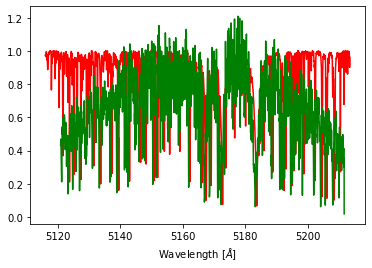

In [48]:
start = 296_000
stop = 332_500
pl.plot(wvlen[start:stop],c[start:stop],'r')
pl.plot(wavelength[2,:], spectrum[2,:]/5.39e4,'g', )
pl.xlabel('Wavelength [$\AA$]')
pl.show()

Cross-correlation function is maximized at dRV =  -26.12732321679971  km/s
  A blue-shift with respect to the template


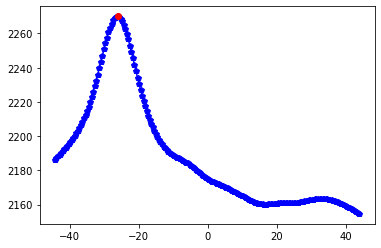

In [51]:
# Carrying out the cross-correlation on Only One Shell 
rv, cc = pyasl.crosscorrRV(wavelength[2,:], spectrum[2,:]/5.39e4, wvlen[start:stop],c[start:stop], -1*rvData, rvData, rvData/100., skipedge=100)

# Find the index of maximum cross-correlation function
maxind = np.argmax(cc)

print("Cross-correlation function is maximized at dRV = ", rv[maxind], " km/s")
if rv[maxind] > 0.0:
    print("  A red-shift with respect to the template")
else:
    print("  A blue-shift with respect to the template")

plt.plot(rv, cc, 'bp-')
plt.plot(rv[maxind], cc[maxind], 'ro')
plt.show()

In [59]:
#Put all the wavelength and flux together in a 1-D list 
HIRESwv = []

for shell in wavelength:
    for val in shell:
        HIRESwv.append(val)
tempFlux = []
for shell in spectrum:
    for pixelCount in shell:
        tempFlux.append(pixelCount/5.39e4)

Cross-correlation function is maximized at dRV =  -25.684487230074296  km/s
  A blue-shift with respect to the template


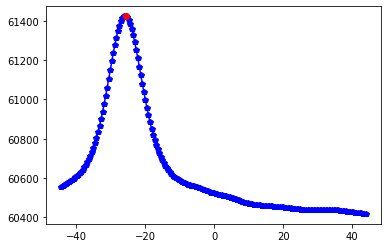

In [67]:
# Carry out the cross-correlation on all the shells at once  
rv, cc = pyasl.crosscorrRV(HIRESwv, tempFlux, wvlen,c, -1*rvData, rvData, rvData/100.)

# Find the index of maximum cross-correlation function
maxind = np.argmax(cc)

print("Cross-correlation function is maximized at dRV = ", rv[maxind], " km/s")
if rv[maxind] > 0.0:
    print("  A red-shift with respect to the template")
else:
    print("  A blue-shift with respect to the template")

plt.plot(rv, cc, 'bp-')
plt.plot(rv[maxind], cc[maxind], 'ro')
plt.show()